In [ ]:
- title: Занятие 7
- author: Svetlana Medvedeva
- date: 2024-10-15
- slug: 2024_lpr_lab07
- ipynb_url: download/2024_lpr_lab07.ipynb

# Лабораторное занятие № 7

# Библиотека scipy

SciPy  — это библиотека Python с открытым исходным кодом, предназначенная для решения научных и математических проблем. Она построена на базе NumPy и позволяет управлять данными, а также визуализировать их с помощью разных высокоуровневых команд. Если вы импортируете SciPy, то NumPy отдельно импортировать не нужно.

Для каких целей используется scipy?

* проведения научных исследований, где требуется использование продвинутой математики;

* для сложных математических расчетов, которые тяжело произвести вручную или с помощью калькулятора;

* глубокого анализа данных, интерполяции и других методов работы с информацией;

* машинного обучения и создания моделей искусственного интеллекта, прогнозирования и построения моделей;

* формирования двумерных и трехмерных графиков, которые можно потом визуализировать (уже при помощи других библиотек).

Отличия от numpy:

* в SciPy гораздо больше функций и методов, чем в NumPy;

* NumPy ориентирована на базовые вычисления и простую работу с матрицами, SciPy предназначена для глубокого научного анализа;

* NumPy не имеет дополнительных зависимостей, вместе с библиотекой не нужно ничего устанавливать. SciPy требует установки NumPy для корректной работы.


Основные модули SciPy для научных вычислений:

* **scipy.special** — специальные функции, возможности и понятия из математической физики;

* **scipy.integrate** — функции для численного интегрирования и решения обыкновенных дифференциальных уравнений;

* **scipy.optimize** — алгоритмы оптимизации (в т.ч. минимизации математических функций);

* **scipy.interpolate** — методы для интерполяции, т.е. для приближенного нахождения какой-либо величины по уже известным отдельным ее значениям;

* **scipy.fft** — преобразования Фурье (операции, сопоставляющие одной функции вещественной переменной другую функцию вещественной переменной);

* **scipy.signal** — методы для обработки и преобразования сигналов;

* **scipy.linalg** — операции линейной алгебры. Модули с этим названием есть и в NumPy, и в SciPy, но их возможности различаются. В SciPy больше продвинутых функций и методов;

* **scipy.sparse.csgraph** — методы для работы с разреженными графами, особыми структурами данных;

* **scipy.spatial** — функции для работы с пространственными структурами данных и алгоритмами;

* **scipy. stats** — операции для статистических расчетов;

* **scipy.ndimage** — обработка многомерных изображений;

* **scipy.io** — ввод и вывод, загрузка и сохранение файлов.


Просмотреть информацию о функции или модуле можно двумя способами:

In [ ]:
pip install scipy

In [ ]:
from scipy import cluster
help(cluster)
help()

Для выхода достаточно ввести quit и нажать Enter.

Посмотреть информацию о функции, модуле и т. д. можно через `info()`:

In [ ]:
import scipy

info(cluster)

Вывести исходный код можно через функцию `source()`:

In [ ]:
scipy.source(cluster)

### Экспоненциальные и тригонометрические функции

In [9]:
from scipy import special
a = special.exp10(3)
print(a)
 
b = special.exp2(3)
print(b)
 
c = special.sindg(90)
print(c)
 
d = special.cosdg(45)
print(d)

1000.0
8.0
1.0
0.7071067811865475


### Интегральные функции

Для вычисления интеграла функции с одной переменной в scipy есть функция `quad`.

```python
quad(
    func, a, b, args=(), full_output=0, epsabs=1.49e-08, 
    epsrel=1.49e-08, limit=50, points=None, weight=None, 
    wvar=None, wopts=None, maxp1=50, limlst=50
)
```

В качестве первого аргумента передаётся подинтегральная функция, далее задаются пределы интегрирования.

Абсолютная погрешность задаётся параметром `epsabs` (значение по умолчанию - `1.49e-8`), а `epsrel` - относительная ошибка.

Подробнее про параметры функции quad() можно посмотреть документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

Вычислим значение интеграла $\int_0^1 x^2 dx$:

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special
from scipy import integrate

In [11]:
a = lambda x: x*x
b = integrate.quad(a, 0, 1)
print(b)

(0.33333333333333337, 3.700743415417189e-15)


Другой вариант задания функции:

In [14]:
def f(x):
    return x ** 2

Можно импортировать из модуля нужные функции и уже по их названию (без указания `scipy.integrate`) обращаться при вызове.

In [15]:
from scipy.integrate import quad, dblquad

x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print("Значение интеграла =", val, ", абсолютная ошибка =", abserr)

Значение интеграла = 0.33333333333333337 , абсолютная ошибка = 3.700743415417189e-15


In [16]:
from scipy.special import jn, yn, jn_zeros

In [17]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Bessel function of second kind
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


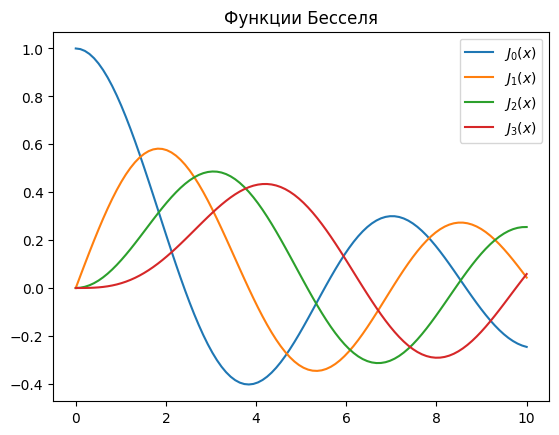

In [18]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend()
plt.title('Функции Бесселя');

**Упражнение 1.** Найдите нули функции Бесселя. Для решения используйте функцию `jn_zeros()`.

In [21]:
n = 0 
m = 5
zeros = jn_zeros(n, m)

print("Нули функции Бесселя J_%d(x):" % n)
for i, zero in enumerate(zeros):
    print("n[%d] = %f" % (i + 1, zero))


Нули функции Бесселя J_0(x):
n[1] = 2.404826
n[2] = 5.520078
n[3] = 8.653728
n[4] = 11.791534
n[5] = 14.930918


In [19]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print("Значение интеграла =", val, ", абсолютная ошибка =", abserr)

Значение интеграла = 0.7366751370811074 , абсолютная ошибка = 9.38922437846188e-13


In [20]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -np.inf, np.inf)

print("Численное решение  = ", val, abserr)

analytical = np.sqrt(np.pi)
print("Аналитическое  решение = ", analytical)

Численное решение  =  1.7724538509055159 1.4202636756659625e-08
Аналитическое  решение =  1.7724538509055159


**Упражнение 1.** Вычислите значение интеграла $\int_{\pi}^{2\pi} \cos^2 x \cdot \sin 2x dx$

In [41]:
def f(x):
    return special.cosdg(x) ** 2 * special.sindg(2 * x)

a = 180
b = 360        

integrate.quad(f, a, b)



(6.8278115877334485e-15, 6.361778389311669e-13)

**Упражнение 2.** Вычислите значение интеграла $\int_{0}^{+ \infty} e^{-10x} dx$

In [47]:
def f(x):
    return np.exp(-10 * x)
 
a = 0
b = np.inf      

integrate.quad(f, a, b)

(0.10000000000000075, 1.1346562200009389e-09)

**Упражнение 3.** Вычислите площадь между графиками представленными ниже.

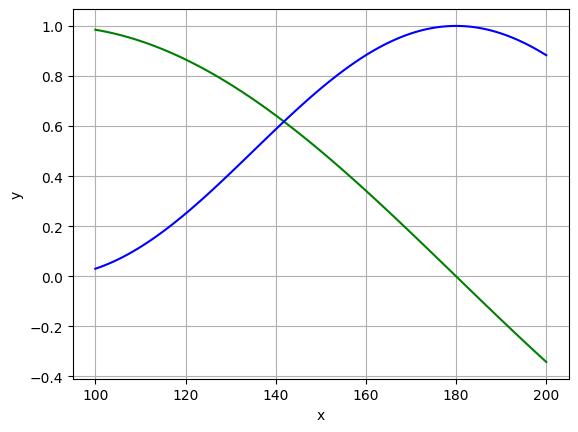

In [54]:
x = np.linspace(100, 200, 100)
y1 = special.sindg(x)
y2 = special.cosdg(x)*special.cosdg(x)

plt.plot(x, y1, 'g')
plt.plot(x, y2, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


In [62]:
import scipy.optimize

def h(x):
    return special.sindg(x) - special.cosdg(x)*special.cosdg(x)
initial_guess = 142
x0 = scipy.optimize.fsolve(h, initial_guess)

def f(x):
    return special.sindg(x)
def g(x):
    return special.cosdg(x)*special.cosdg(x)

a = 100
b = x0
c = 200

i1 = integrate.quad(f, a, b)[0]
i2 = integrate.quad(g, a, b)[0]
i3 = integrate.quad(f, b, c)[0]
i4 = integrate.quad(g, b, c)[0]
s = i1 - i2 + i4 - i3
print(s)

66.61566870403117


### Двойные интегральные функции

Функция `dblquad` используется для вычисления двойных интегралов. Функция `dblquad()` принимает функцию, которую нужно интегрировать, в качестве параметра, а также 4 переменных: две границы и функции dy и dx.



In [63]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print(val, abserr)

0.7853981633974476 1.3753098510218537e-08


**Упражнение 4.** Вычислите значение интеграла $\int_{1}^{3}\int_{0}^{2} [\exp(x^2 + y^2) \cdot x^2 + \cos(xy) ]dxdy$.

In [87]:
def f(x, y):
    return np.exp(x**2 + y**2) * x**2 + np.cos(x * y)

x_lower = 0  
x_upper = 2
y_lower = 1
y_upper = 3

val, abserr = dblquad(f, y_lower, y_upper, lambda y: x_lower, lambda y: x_upper)

print(val, abserr)


66918.20317809505 1.654846775921036e-05


**Упражнение 5.** Вычислите значение интеграла $\int_{1}^{3}\int_{0}^{2} [\exp(x^2 + y^2) \cdot x^2 + \cos(xy) ]dxdy$ с абсолютной погрешностью $10^{-10}$.

In [242]:
def f(x, y):
    return np.exp(x**2 + y**2) * x**2 + np.cos(x * y)

x_lower = 0  
x_upper = 2
y_lower = 1
y_upper = 3

val, abserr = dblquad(f, y_lower, y_upper, lambda y: x_lower, lambda y: x_upper)

print(val, abserr)

66918.20317809502 1.374116651512618e-08


**Упражнение 6.** Вычислите значение интеграла $\int_{0}^{1}\int_{x}^{2-x} axy\ dxdy$, где $a$ - константа. Рассмотрите значения $a = 1, 2, 3, 10$.

In [198]:

f = lambda y, x, a: a*x*y
val1, abserr1 = integrate.dblquad(f, 0, 1, lambda x: x, lambda x: 2-x, args=(1,))
print(val1)
val2, abserr2 = integrate.dblquad(f, 0, 1, lambda x: x, lambda x: 2-x, args=(2,))
print(val2)
val3, abserr3 = integrate.dblquad(f, 0, 1, lambda x: x, lambda x: 2-x, args=(3,))
print(val3)
val4, abserr4 = integrate.dblquad(f, 0, 1, lambda x: x, lambda x: 2-x, args=(10,))
print(val4)

0.33333333333333337
0.6666666666666667
1.0
3.333333333333334


### Линейная алгебра

Решим систему уравнений: $A x = b$

In [231]:
from scipy.linalg import *

A = np.array([[10,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

In [232]:
print(det(A))

-27.0


In [233]:
x = solve(A, b)

x

array([-2.97180911e-17, -4.89787784e-16,  3.33333333e-01])

Проверим корректность решения:

In [234]:
np.dot(A, x) - b

array([ 0.0000000e+00,  0.0000000e+00, -4.4408921e-16])

### Собственные числа и собственные вектора

В scipy есть функция eigvals для вычисления собственных чисел и собственных векторов.

In [132]:
evals, evecs = eig(A)
print('Собственные числа матрицы A равны: ', evals, 'Собственные вектора : ', evecs)

Собственные числа матрицы A равны:  [17.87276096+0.j  6.36459564+0.j -0.23735659+0.j] Собственные вектора :  [[ 0.41630037  0.70354554 -0.0551077 ]
 [ 0.48717979 -0.42895366 -0.73372825]
 [ 0.76769125 -0.56658841  0.67720455]]


**Упражнение 7.** Вычислите собственные числа матрицы `A = np.array([[5,6,3], [-1,0,1], [1,2,-1]])`.

In [133]:
A = np.array([[5,6,3], [-1,0,1], [1,2,-1]])
evals, evecs = eig(A)
print(evals)

[-2.+0.j  4.+0.j  2.+0.j]


### Операции с матрицами

Обращение матрицы:

In [134]:
B = inv(A)
B

array([[ 1.25000000e-01, -7.50000000e-01, -3.75000000e-01],
       [-2.22044605e-17,  5.00000000e-01,  5.00000000e-01],
       [ 1.25000000e-01,  2.50000000e-01, -3.75000000e-01]])

Вычисление определителя матрицы:

In [135]:
det(B)

np.float64(-0.0625)

Вычисление нормы матрицы:

In [136]:
norm(A, ord=2), norm(A, ord=np.inf)

(np.float64(8.544439571431962), np.float64(14.0))

**Упражнение 8.** Вычислите определитель матрицы $2A + E$, где `A = np.array([[1,2,3], [4,5,6], [7,8,9]])` и E - единичная матрица.

In [146]:
E = np.eye(3)
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
R = 2 * A + E
print((det(R)))
print(int(np.linalg.det(R)))

-40.999999999999986
-41


### Функции оптимизации

В scipy.optimize реализовано несколько алгоритмов оптимизации. Детально вы их рассмотрите на следующих курсах, в частности на вычислительной математике. 

Рассмотрим функцию от одной переменной и найдём её минимум.

In [147]:
def f(x):
    return 3*x**3 + (x-2)**2 + x**6 #+ np.cos(x)

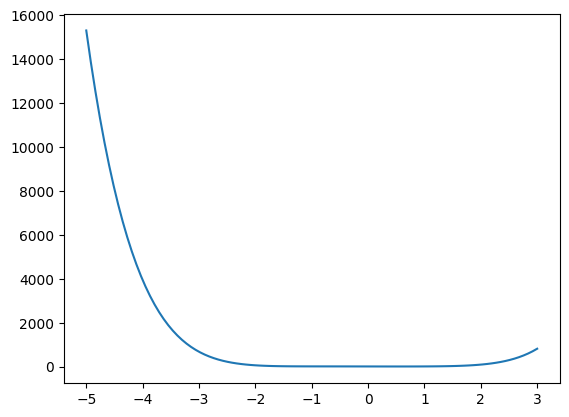

In [148]:
fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

Для нахождения минимума функции `f(x)` воспользуемся **fmin_bfgs** из optimize.

In [151]:
from scipy import optimize

x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: 2.628773
         Iterations: 6
         Function evaluations: 26
         Gradient evaluations: 13


array([0.54140593])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 3


array([-1.79994222e-08])

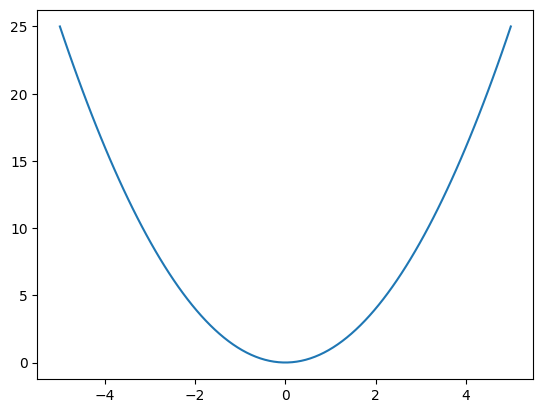

In [150]:
def f1(x):
    return x**2

fig, ax  = plt.subplots()
x = np.linspace(-5, 5, 100)
ax.plot(x, f1(x));

x_min = optimize.fmin_bfgs(f1, -2)
x_min 

**Упражнение 9.** Вычислите минимум функции $f(x) = x^2 + 10 \cdot \cos(x)\cdot x$.

Optimization terminated successfully.
         Current function value: -23.404552
         Iterations: 7
         Function evaluations: 16
         Gradient evaluations: 8


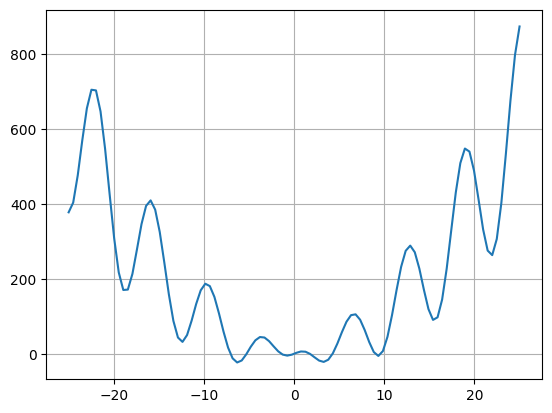

In [170]:
def h(x):
    return x**2 + np.cos(x) * 10 * x

fig, ax  = plt.subplots()
x = np.linspace(-25, 25, 100)
plt.grid()
ax.plot(x, f(x))

x_min = optimize.fmin_bfgs(h, -8)


### Функции интерполяции

Библиотека SciPy включает подпакет `scipy.interpolate`, состоящий из сплайновых функций и классов, одно- и многомерных интерполяционных классов и так далее.

In [171]:
from scipy.interpolate import *

In [172]:
def f(x):
    return np.sin(x) + 10

In [173]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic') 
y_interp2 = cubic_interpolation(x)

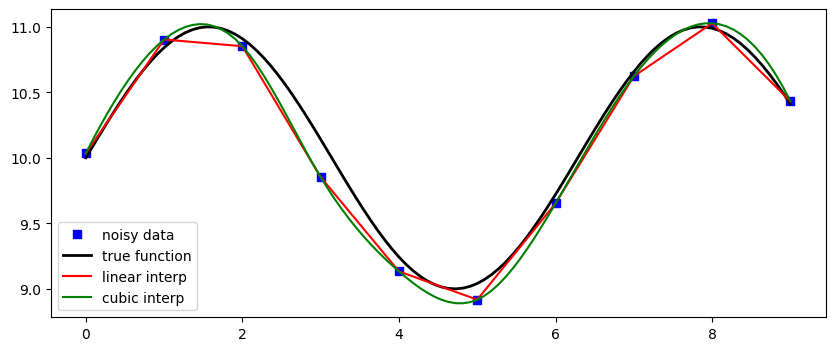

In [180]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

**Упражнение 10.** Постройте линейную и кубическую интерполяцию функции $f(x) = x^2 + 10x -5$

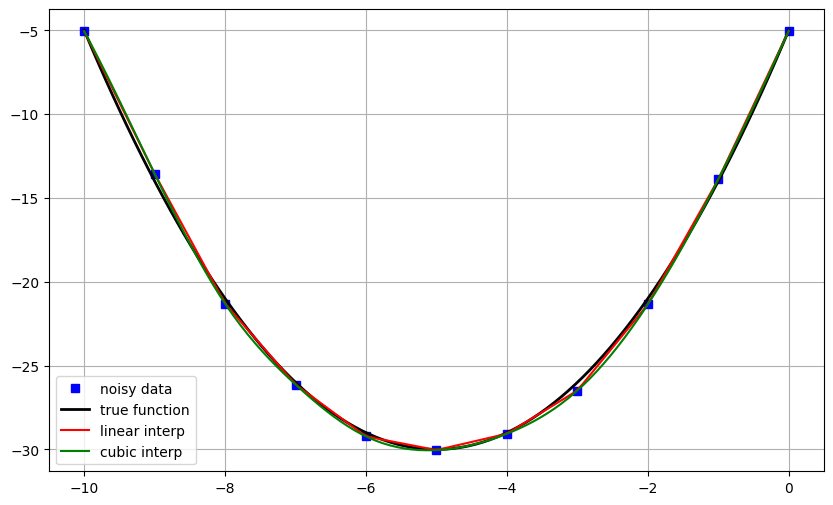

In [227]:
def g(x):
    return x**2 + 10*x - 5

n = np.arange(-10, 1)  
x = np.linspace(-10, 0, 100)

y_meas = g(n) + 0.25 * np.random.randn(len(n))
y_real = g(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic') 
y_interp2 = cubic_interpolation(x)

fig, ax = plt.subplots(figsize=(10,6))
plt.grid()
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3)

**Упражнение 11.** Постройте линейную и кубическую интерполяцию функции $f(x) = \cos(x) \cdot \sin(x) + x^2$

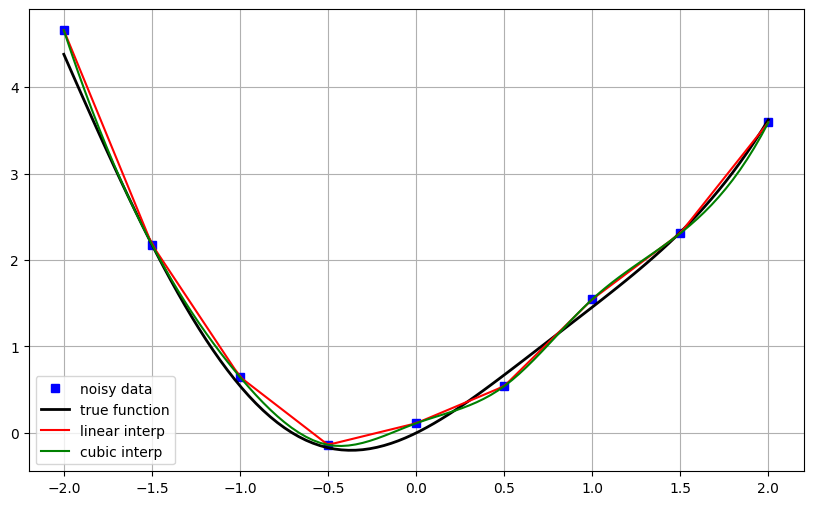

In [230]:
def h(x):
    return x**2 + np.cos(x) * np.sin(x)

n = np.arange(-2, 2.5, 0.5)  
x = np.linspace(-2, 2, 100)

y_meas = h(n) + 0.1 * np.random.randn(len(n))
y_real = h(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic') 
y_interp2 = cubic_interpolation(x)

fig, ax = plt.subplots(figsize=(10,6))
plt.grid()
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3)